#### Problem statement

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like leaflets three, let it be for Poisonous Oak and Ivy.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,r2_score,roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### EDA

In [3]:
data.shape

(8124, 23)

8124 rows and 23 columns in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

there is not any null values in any columns and all are objects

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no missing data in columns

class column is our target variable, and dataset is object type

In [6]:
print('Number of edible mushrooms are:',data['class'].value_counts()[0])
print('Number of poisonous mushrooms are:',data['class'].value_counts()[1])
print('Unbalanced dataset' if data['class'].value_counts()[0]!=data['class'].value_counts()[1] else 'Balanced dataset')

Number of edible mushrooms are: 4208
Number of poisonous mushrooms are: 3916
Unbalanced dataset


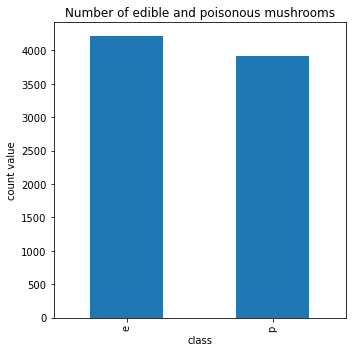

In [7]:
plt.figure(figsize=[5,5])
data['class'].value_counts().plot(kind='bar')
plt.xlabel("class")
plt.ylabel('count value')
plt.title('Number of edible and poisonous mushrooms')
plt.tight_layout()

converting categorical data into numerical 

In [8]:
# Handling the categorical Varibales
le = LabelEncoder()
list1=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size',                   
'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']     
for val in list1:
    data[val] = le.fit_transform(data[val].astype(str))
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


catergorical data is converted to numerical using LabelEncoder

In [9]:
data.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

from this we can drop the columns whose criteria is not met i.e. correlation>=+-0.5

##### Checking outliers

<AxesSubplot:xlabel='bruises'>

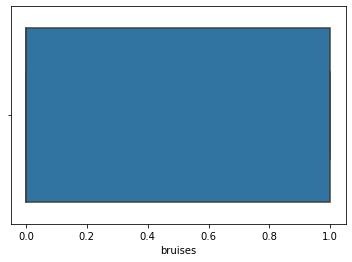

In [10]:
sns.boxplot(data['bruises'])

<AxesSubplot:xlabel='gill-size'>

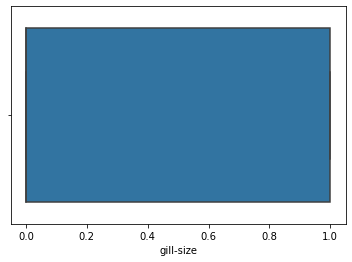

In [11]:
sns.boxplot(data['gill-size'])

<AxesSubplot:xlabel='gill-color'>

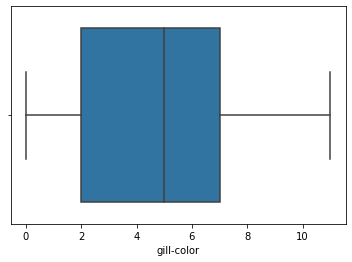

In [12]:
sns.boxplot(data['gill-color'])

there are no outliers observed 

In [13]:
# Segregatting the data into features and target variable
x=data.drop(columns=['class','veil-type'])
y=data['class']

viel-type coloumn can br dropped as it contains only NaN values and does not impact the target variable

In [14]:
sm =SMOTE()
x,y= sm.fit_resample(x,y)

used oversampling to avoid unbalanced dataset

In [15]:
y.value_counts()

0    4208
1    4208
Name: class, dtype: int64

now the dataset is balanced. we move to Feature Scaling

In [16]:
scaler= StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.03092308,  0.13578582, -0.19496539, ..., -0.66857746,
        -0.52661511,  2.01510027],
       [ 1.03092308,  0.13578582,  1.76634071, ..., -0.25184306,
        -1.33552054, -0.30211017],
       [-2.09520239,  0.13578582,  1.37407949, ..., -0.25184306,
        -1.33552054,  0.85649505],
       ...,
       [-0.8447522 ,  0.13578582, -0.19496539, ...,  1.41509455,
         0.28229031,  1.43579766],
       [-0.8447522 ,  0.13578582, -0.19496539, ...,  1.41509455,
         0.28229031,  0.27719244],
       [ 1.03092308,  0.13578582,  1.37407949, ..., -0.25184306,
        -0.52661511, -0.30211017]])

USe PCA for Dimension Reducton

In [17]:
for i in range(2,22):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.31062277849248165
3 0.4250065258982358
4 0.5271680448921061
5 0.60706425055164
6 0.6726681762311078
7 0.7193742521952633
8 0.7646357581366056
9 0.8014591005981023
10 0.8360554869793014
11 0.863558196005502
12 0.8891957772306385
13 0.9131501705564337
14 0.9357849425406055
15 0.954023235302391
16 0.9690999198781157
17 0.9794893406996918
18 0.9870753778534316
19 0.9935183614781447
20 0.9970578544212971
21 1.0


take pca component with data retention more than 95% so i will choose 15

In [18]:
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)

In [19]:
# To find the best random state using Decision Tree Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9697149643705463 on random state 93


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=93)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6732, 21)
(1684, 21)
(6732,)
(1684,)


80% of the data (6731 rows) will be available for training the model & 20% (1684 rows) will be available for testing the model

#### Model Building & Evaluation

target variable is categorical so we can build classification model
Evaluation can be done by confusion_matrix, classification_report,accuracy_score

In [21]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Model_accuracy_score:',accuracy_score(y_test,pred))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Model_accuracy_score: 0.9697149643705463
Confusion matrix:
 [[787  23]
 [ 28 846]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       810
           1       0.97      0.97      0.97       874

    accuracy                           0.97      1684
   macro avg       0.97      0.97      0.97      1684
weighted avg       0.97      0.97      0.97      1684



In [22]:
#For KNN we need to know the best value of k using grid search
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 1}

used GridSearchCV for fine tuning KNN. The best paramter for n_neighbors is 1

In [23]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Model_accuracy_score:',accuracy_score(y_test,predknn))
print('Confusion matrix:\n',confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Model_accuracy_score: 1.0
Confusion matrix:
 [[810   0]
 [  0 874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [24]:
# RandomForest classifcation Model
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print('Model_accuracy_score:',accuracy_score(y_test,predrf))
print('Confusion matrix:\n',confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Model_accuracy_score: 1.0
Confusion matrix:
 [[810   0]
 [  0 874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [25]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Model_accuracy_score:',accuracy_score(y_test,predsv))
print('Confusion matrix:\n',confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Model_accuracy_score: 1.0
Confusion matrix:
 [[810   0]
 [  0 874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [26]:
# Adaboost classifcation Model
ad= AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print('Model_accuracy_score:',accuracy_score(y_test,predad))
print('Confusion matrix:\n',confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Model_accuracy_score: 1.0
Confusion matrix:
 [[810   0]
 [  0 874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



Accuracy score of all model is 1 except LogisticRegression which 0.972. 
So we'll proceed to cross validation to check best model out of all

##### Cross Validation

In [27]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.74287411 0.97801545 0.89720737 0.99524658 0.69756387]
0.862181476635857 0.12139509690991325


In [28]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[1.         1.         0.99762329 1.         0.66250743]
0.9320261437908497 0.13476250204609366


In [29]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[1.        1.        1.        1.        0.5959596]
0.9191919191919192 0.16161616161616163


In [30]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[1.         1.         0.99286988 1.         0.56090315]
0.910754604872252 0.1749475237654623


In [31]:
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[1.         1.         1.         1.         0.74212715]
0.948425430778372 0.10314913844325609


out of all ada boost has best model accuracy score so it is the best model to implement

### HyperParameter tuning

In [32]:
parameter={'random_state':np.arange(1,100),'algorithm':['SAMME', 'SAMME.R']}

In [33]:
gcv=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [34]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [35]:
gcv.best_params_

{'algorithm': 'SAMME.R', 'random_state': 1}

In [36]:
best_model= AdaBoostClassifier(algorithm='SAMME.R', random_state= 1)
best_model.fit(x_train,y_train)
pred1=best_model.predict(x_test)
ad.score(x_train,y_train)
print('Model_accuracy_score:',accuracy_score(y_test,pred1))
print('Confusion matrix:\n',confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Model_accuracy_score: 1.0
Confusion matrix:
 [[810   0]
 [  0 874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      1.00      1.00       874

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [37]:
fpr, tpr, threshold = roc_curve(y_test,pred)

In [38]:
auc = roc_auc_score(y_test,pred)
auc

0.9697841624996468

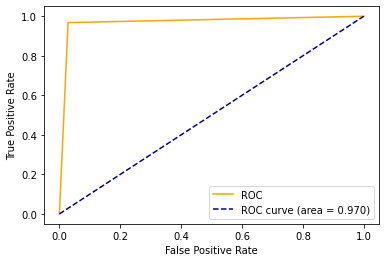

In [39]:
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Saving the model

In [40]:
joblib.dump(best_model,'Model_Mushroom.obj')

['Model_Mushroom.obj']